# Risk n Finance Management - Kelompok 9

##### Import Library

In [1]:
# Import Library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

##### Import Data

In [ ]:
df = pd.read_csv("..\Loan_status_2007-2020Q3.csv", nrows=1000000)

In [4]:
needed_columns = [
    "loan_amnt",
    "term",
    "int_rate",
    "installment",
    "grade",
    "sub_grade",
    "emp_length",
    "home_ownership",
    "issue_d",
    "verification_status",
    "purpose",
    "dti",
    "delinq_2yrs",
    "loan_status",
    "zip_code",
    "avg_cur_bal",
    "revol_bal",
]
df = df[needed_columns]
print(df.head())

        loan_amnt        term int_rate  installment grade sub_grade  \
243474    19200.0   60 months   30.94%       632.32     G        G4   
251528    24000.0   60 months   15.05%       571.59     C        C4   
252226    15000.0   60 months   13.59%       345.85     C        C2   
253344    26000.0   36 months   14.08%       889.63     C        C3   
268219    35000.0   60 months    9.93%       742.45     B        B2   

       emp_length home_ownership   issue_d verification_status  \
243474    2 years       MORTGAGE  Sep-2017     Source Verified   
251528   < 1 year           RENT  Sep-2017        Not Verified   
252226   < 1 year       MORTGAGE  Sep-2017        Not Verified   
253344    7 years       MORTGAGE  Sep-2017            Verified   
268219  10+ years       MORTGAGE  Aug-2017     Source Verified   

                   purpose    dti  delinq_2yrs         loan_status zip_code  \
243474  debt_consolidation  52.06          0.0             Current    707xx   
251528  debt_conso

##### Pre-Processing

In [5]:
df = df.dropna()
print("\nNull value count")
for col in needed_columns:
    print("{} = {}".format(col, df[col].isnull().sum()))


Null value count
loan_amnt = 0
term = 0
int_rate = 0
installment = 0
grade = 0
sub_grade = 0
emp_length = 0
home_ownership = 0
issue_d = 0
verification_status = 0
purpose = 0
dti = 0
delinq_2yrs = 0
loan_status = 0
zip_code = 0
avg_cur_bal = 0
revol_bal = 0


In [6]:
## Interest rate
df["int_rate"] = df["int_rate"].str.replace("%", "").str.strip().astype(float)

## Term
df["term"] = df["term"].str.replace("months", "").str.strip().astype(int)

In [7]:
print(df.head())

        loan_amnt  term  int_rate  installment grade sub_grade emp_length  \
243474    19200.0    60     30.94       632.32     G        G4    2 years   
251528    24000.0    60     15.05       571.59     C        C4   < 1 year   
252226    15000.0    60     13.59       345.85     C        C2   < 1 year   
253344    26000.0    36     14.08       889.63     C        C3    7 years   
268219    35000.0    60      9.93       742.45     B        B2  10+ years   

       home_ownership   issue_d verification_status             purpose  \
243474       MORTGAGE  Sep-2017     Source Verified  debt_consolidation   
251528           RENT  Sep-2017        Not Verified  debt_consolidation   
252226       MORTGAGE  Sep-2017        Not Verified         credit_card   
253344       MORTGAGE  Sep-2017            Verified  debt_consolidation   
268219       MORTGAGE  Aug-2017     Source Verified  debt_consolidation   

          dti  delinq_2yrs         loan_status zip_code  avg_cur_bal  \
243474  52.06 

##### Exploratory Data Analysis

<Axes: title={'center': 'Loan Status Values for Lending Club'}>

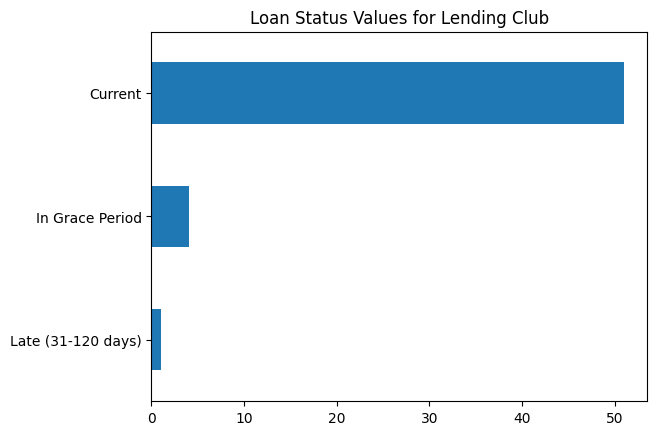

In [9]:
df["loan_status"].dropna().value_counts().sort_values().plot(
    kind="barh", title="Loan Status Values for Lending Club"
)

<Axes: title={'center': 'Loan Grades for Lending Club'}>

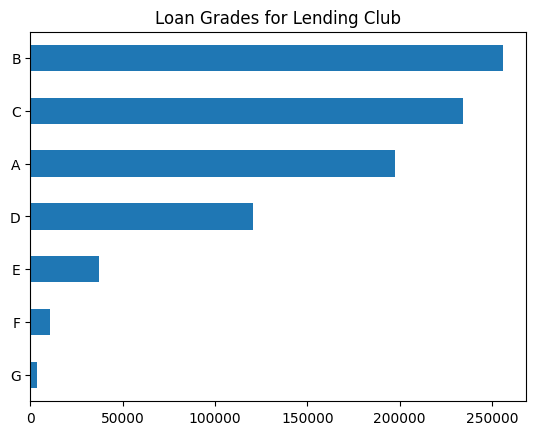

In [8]:
df["grade"].value_counts().sort_values().plot(
    kind="barh", title="Loan Grades for Lending Club"
)

In [2]:
sns.violinplot(x="loan_amnt", y="home_ownership", data=df)
plt.show()

NameError: name 'df' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

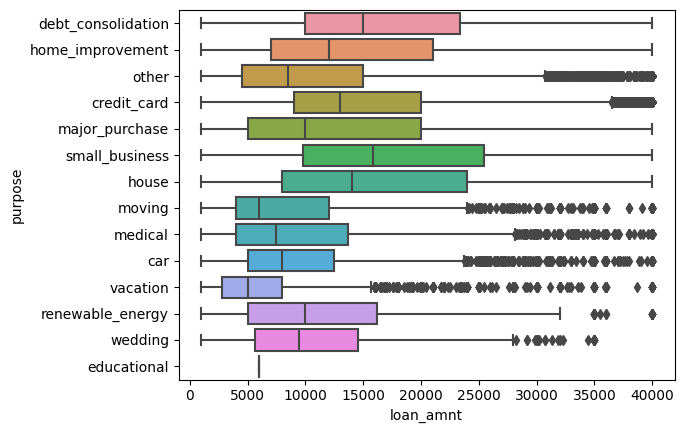

In [10]:
sns.boxplot(x="loan_amnt", y="purpose", data=df)
plt.show

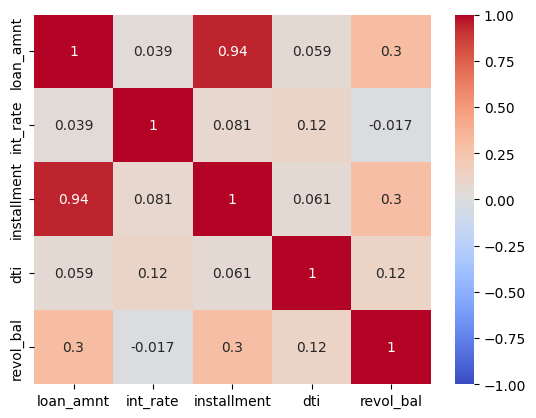

In [11]:
numeric_df = df[["loan_amnt", "int_rate", "installment", "dti", "revol_bal"]]
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

In [12]:
le = LabelEncoder()
df["emp_length"] = le.fit_transform(df["emp_length"])
df["grade"] = le.fit_transform(df["grade"])
df["sub_grade"] = le.fit_transform(df["sub_grade"])
df["home_ownership"] = le.fit_transform(df["home_ownership"])
df["issue_d"] = le.fit_transform(df["issue_d"])
df["verification_status"] = le.fit_transform(df["verification_status"])
df["purpose"] = le.fit_transform(df["purpose"])
df["loan_status"] = le.fit_transform(df["loan_status"])
df["zip_code"] = le.fit_transform(df["zip_code"])

##### Modelling Decision Tree

In [ ]:
X = df.drop("loan_status", axis=1)  # Features
y = df["loan_status"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [13]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Precision:", precision_dt)
print("Decision Tree Recall:", recall_dt)
print("Decision Tree F1-Score:", f1_dt)

Decision Tree Accuracy: 0.5004442788907384
Decision Tree Precision: 0.5052222931585774
Decision Tree Recall: 0.5004442788907384
Decision Tree F1-Score: 0.5027698659953561


In [14]:
print(
    "Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt)
)

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.18      0.17     29161
           1       0.56      0.55      0.56    111692
           2       0.00      0.00      0.00        39
           3       0.55      0.55      0.55    113078
           4       0.01      0.01      0.01      1312
           5       0.00      0.00      0.00       305
           6       0.01      0.01      0.01      2134

    accuracy                           0.50    257721
   macro avg       0.19      0.19      0.19    257721
weighted avg       0.51      0.50      0.50    257721



In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

sns.heatmap(cm_dt, annot=True, xticklabels=df["loan_status"], fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000001231ADAA980> (for post_execute):


KeyboardInterrupt: 

In [10]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [12]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1-Score:", f1_rf)

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Accuracy: 0.6018989527434706
Random Forest Precision: 0.5681430453899806
Random Forest Recall: 0.6018989527434706
Random Forest F1-Score: 0.567478473753174


In [20]:
print(
    "Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf)
)

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.04      0.07     29161
           1       0.59      0.76      0.66    111692
           2       0.00      0.00      0.00        39
           3       0.63      0.61      0.62    113078
           4       0.00      0.00      0.00      1312
           5       0.00      0.00      0.00       305
           6       0.00      0.00      0.00      2134

    accuracy                           0.60    257721
   macro avg       0.22      0.20      0.19    257721
weighted avg       0.57      0.60      0.57    257721



C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


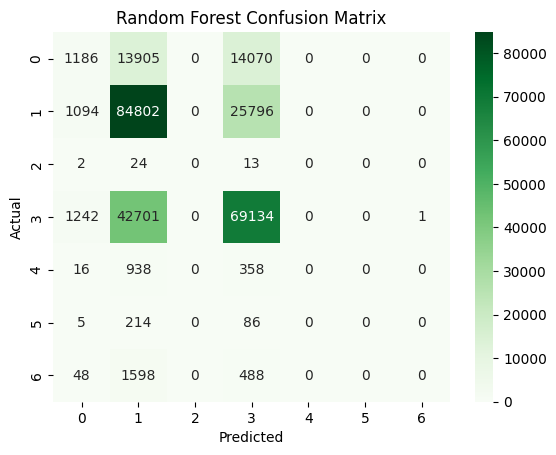

In [21]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### XGBoost

In [25]:
xgb_model = xgb.XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [26]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

print("XGBoost Accuracy:", accuracy_xgb)
print("XGBoost Precision:", precision_xgb)
print("XGBoost Recall:", recall_xgb)
print("XGBoost F1-Score:", f1_xgb)

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGBoost Accuracy: 0.6226461949162079
XGBoost Precision: 0.5942968604333495
XGBoost Recall: 0.6226461949162079
XGBoost F1-Score: 0.584772498737311


In [32]:
print(
    "XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb)
)

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.04      0.06     29161
           1       0.60      0.80      0.69    111692
           2       0.00      0.00      0.00        39
           3       0.66      0.62      0.64    113078
           4       0.00      0.00      0.00      1312
           5       0.00      0.00      0.00       305
           6       0.00      0.00      0.00      2134

    accuracy                           0.62    257721
   macro avg       0.24      0.21      0.20    257721
weighted avg       0.59      0.62      0.58    257721



C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


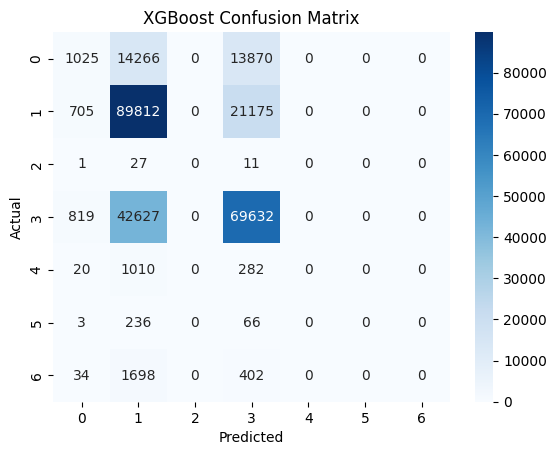

In [31]:
cm_dt = confusion_matrix(y_test, y_pred_xgb)

sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Logistic Regression

In [33]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Precision:", precision_lr)
print("Logistic Regression Recall:", recall_lr)
print("Logistic Regression F1-Score:", f1_lr)

Logistic Regression Accuracy: 0.5083947369442149
Logistic Regression Precision: 0.44722227312299717
Logistic Regression Recall: 0.5083947369442149
Logistic Regression F1-Score: 0.4678943824094748


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
print(
    "Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr)
)

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     29161
           1       0.53      0.45      0.49    111692
           2       0.00      0.00      0.00        39
           3       0.50      0.71      0.58    113078
           4       0.00      0.00      0.00      1312
           5       0.00      0.00      0.00       305
           6       0.00      0.00      0.00      2134

    accuracy                           0.51    257721
   macro avg       0.15      0.17      0.15    257721
weighted avg       0.45      0.51      0.47    257721



C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


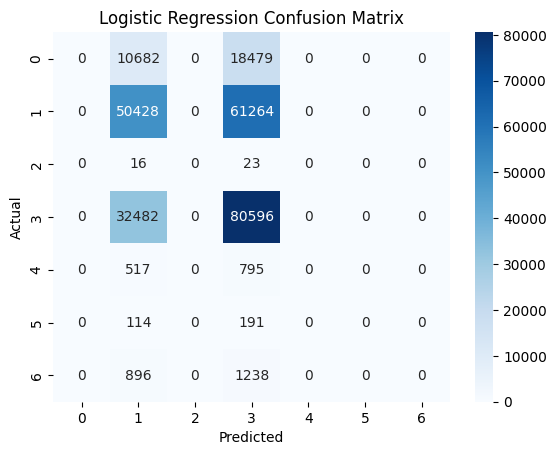

In [37]:
cm_dt = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()